In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import pointbiserialr
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
from scipy.stats import zscore
from scipy.stats import shapiro, levene, f_oneway , chi2 , kruskal , t , mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy.stats import kstest
import pingouin as pg
from statsmodels.stats.multitest import multipletests
import scikit_posthocs as sp

# Data Cleaning

In [12]:
df = pd.read_excel('data.xlsx')
df.head()

,id,group,quest_timing,fps_wk_hr,total_wk_hr,roleplay_wk_hr,strategy_wk_hr,years_play,gaming_ability_connection,media_reports,...,digit_1_max,digit_2_max,average_digit_max,group_by_wk_hr,average_digit_correct,filter_$,group_by_fps_wk_hr,choice_mean_correct,simon_mean_correct,alt_mean_correct
0,1,1,1,2,3,3,3,5,7,2,...,5,9,7.0,NaN,5.5,1,1.0,24.0,20.0,21.0
1,2,1,1,3,4,1,1,5,10,2,...,4,4,4.0,NaN,4.0,1,NaN,23.5,22.5,23.5
2,3,1,1,1,4,1,3,5,9,1,...,6,6,6.0,NaN,5.5,1,1.0,24.0,22.5,22.0
3,4,1,1,3,4,1,2,5,9,1,...,6,6,6.0,NaN,4.0,1,NaN,23.5,22.0,22.0
4,5,1,1,6,4,2,2,5,8,1,...,6,8,7.0,NaN,5.0,1,2.0,23.5,21.5,20.5


In [4]:
df.columns

Index(['id', 'group', 'quest_timing', 'fps_wk_hr', 'total_wk_hr',
       'roleplay_wk_hr', 'strategy_wk_hr', 'years_play',
       'gaming_ability_connection', 'media_reports', 'choice_famil_RT',
       'choice_famil_correct_sum', 'simon_famil_RT', 'simon_famil_correct_sum',
       'alt_famil_RT', 'alt_famil_correct_sum', 'digit_famil_correct_sum',
       'digit_famil_max', 'choice_1_RT', 'choice_2_RT', 'choice_1_correct',
       'choice_2_correct', 'choice_mean_RT', 'choice_total_correct',
       'simon_1_RT', 'simon_2_RT', 'simon_1_correct', 'simon_2_correct',
       'simon_mean_RT', 'simon_total_correct', 'alt_1_RT', 'alt_2_RT',
       'alt_1_correct', 'alt_2_correct', 'alt_mean_RT', 'alt_total_correct',
       'digit_1_correct', 'digit_2_correct', 'digit_1_max', 'digit_2_max',
       'average_digit_max', 'group_by_wk_hr', 'average_digit_correct',
       'filter_$', 'group_by_fps_wk_hr', 'choice_mean_correct',
       'simon_mean_correct', 'alt_mean_correct'],
      dtype='object')

In [5]:
df.describe()

,id,group,quest_timing,fps_wk_hr,total_wk_hr,roleplay_wk_hr,strategy_wk_hr,years_play,gaming_ability_connection,media_reports,...,digit_1_max,digit_2_max,average_digit_max,group_by_wk_hr,average_digit_correct,filter_$,group_by_fps_wk_hr,choice_mean_correct,simon_mean_correct,alt_mean_correct
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,131.000000,187.000000,187.000000,133.000000,187.000000,185.000000,166.00000
mean,94.000000,1.577540,1.497326,2.358289,3.877005,2.101604,2.144385,4.770053,7.823529,1.508021,...,6.598930,6.663102,6.631016,1.557252,5.775401,0.994652,1.105263,23.740642,22.454054,21.63253
std,54.126395,0.495277,0.501335,1.361914,1.694664,1.457405,1.354208,0.715092,1.680336,0.511891,...,2.017291,2.573412,1.877341,0.498618,1.793157,0.073127,0.308052,0.437927,1.285072,2.42660
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000,21.000000,17.500000,12.00000
25%,47.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,7.000000,1.000000,...,5.000000,5.000000,5.500000,1.000000,4.500000,1.000000,1.000000,23.500000,22.000000,21.00000
50%,94.000000,2.000000,1.000000,2.000000,4.000000,2.000000,2.000000,5.000000,8.000000,2.000000,...,6.000000,6.000000,6.500000,2.000000,5.500000,1.000000,1.000000,24.000000,22.500000,22.50000
75%,140.500000,2.000000,2.000000,3.000000,6.000000,2.000000,2.000000,5.000000,9.000000,2.000000,...,8.000000,8.000000,7.750000,2.000000,7.500000,1.000000,1.000000,24.000000,23.500000,23.50000
max,187.000000,2.000000,2.000000,7.000000,6.000000,7.000000,7.000000,5.000000,10.000000,3.000000,...,11.000000,11.000000,11.000000,2.000000,9.000000,1.000000,2.000000,24.000000,24.000000,24.00000


# Exploratory Analyses

## LASSO Regression

In [8]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import pandas as pd

X_cols = ['group', 'fps_wk_hr', 'roleplay_wk_hr', 'strategy_wk_hr', 'media_reports', 'gaming_ability_connection', 'years_play']
flags = [1, 1, 0, 0, 1, 1, 0]
cols = []
for i in range(len(flags)):
    if flags[i]:
        cols.append(X_cols[i])
X = df[cols].copy()
y = df['simon_mean_RT']

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X, y)

coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

print("LASSO Regression Model Coefficients Summary:")
print("============================================")
print(coefficients_df)

y_pred = lasso_model.predict(X)
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared:.4f}")

LASSO Regression Model Coefficients Summary:
                     Feature  Coefficient
3  gaming_ability_connection    -4.895362
0                      group     4.226812
1                  fps_wk_hr     3.887040
2              media_reports    -0.000000
R-squared: 0.0271


## Stepwise Regression

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

X_cols = ['group', 'fps_wk_hr', 'roleplay_wk_hr', 'strategy_wk_hr', 'media_reports', 'gaming_ability_connection', 'years_play']
flags = [0, 0, 0, 0, 0, 1, 0]
cols = []
for i in range(len(flags)):
    if flags[i]:
        cols.append(X_cols[i])
X = df[cols].copy()
y = df['simon_mean_RT']

linreg_model = LinearRegression()

sfs = SFS(linreg_model, k_features='best', forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X, y)

selected_features = list(sfs.k_feature_names_)
selected_indices = list(sfs.k_feature_idx_)

X_selected = X.iloc[:, selected_indices]
linreg_model.fit(X_selected, y)

y_pred = linreg_model.predict(X_selected)
r_squared = r2_score(y, y_pred)

coefficients_df = pd.DataFrame({'Feature': X_selected.columns, 'Coefficient': linreg_model.coef_})

print("Stepwise Regression Model Summary:")
print("==================================")
print(f"Selected Features: {', '.join(selected_features)}")
print(f"R-squared: {r_squared:.4f}")
print("\nModel Coefficients:")
print(coefficients_df)


Stepwise Regression Model Summary:
Selected Features: gaming_ability_connection
R-squared: 0.0172

Model Coefficients:
                     Feature  Coefficient
0  gaming_ability_connection    -5.103668


/Users/vedanivaschowdary/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


In [13]:
critical_variables = ['choice_mean_RT', 'choice_total_correct', 'simon_mean_RT', 
                      'simon_total_correct', 'alt_mean_RT', 'alt_total_correct', 
                      'digit_1_correct', 'digit_2_correct', 'average_digit_max']

In [14]:
df['group'] = df['group_by_wk_hr']
df = df.dropna(subset=['group_by_wk_hr']).reset_index(drop=True).copy()
df.drop(['group_by_fps_wk_hr','group_by_wk_hr', 'filter_$'], axis=1, inplace=True)
df['group'] = df['group'].astype(int)

if (df.isnull().values.any()):
    print('There are missing values in the data, replacing them with their mean values')
    df.fillna(df.mean(), inplace=True)
    for col in ['simon_1_correct', 'simon_2_correct', 'alt_1_correct', 'alt_2_correct']:
        df[col] = df[col].astype(int)
else:   
    print('There are no missing values in the data')

There are missing values in the data, replacing them with their mean values


In [16]:
group1_data, group2_data = df[df['group'] == 1], df[df['group'] == 2]

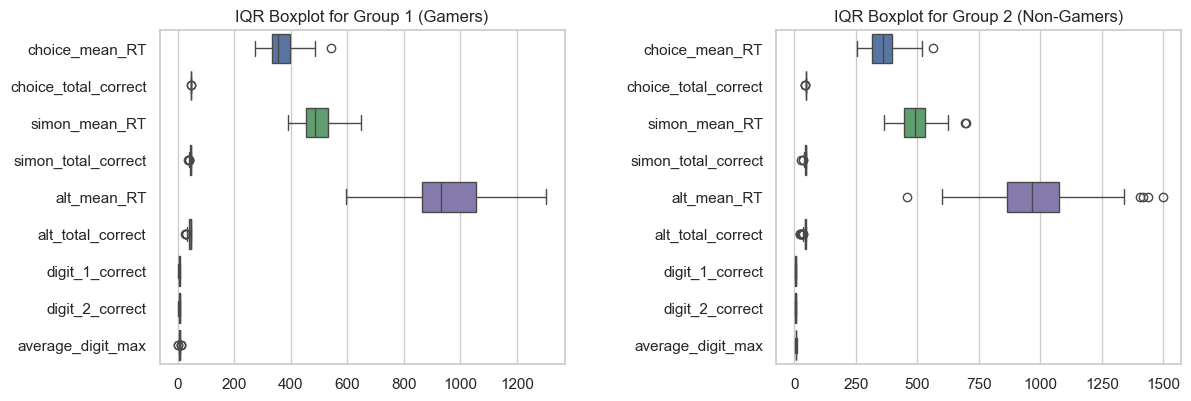

In [516]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
fig.tight_layout(pad=10.0)

sns.boxplot(data=group1_data[critical_variables], orient="h", ax=axs[0])
axs[0].set_title('IQR Boxplot for Group 1 (Gamers)')

sns.boxplot(data=group2_data[critical_variables], orient="h", ax=axs[1])
axs[1].set_title('IQR Boxplot for Group 2 (Non-Gamers)')

plt.show()

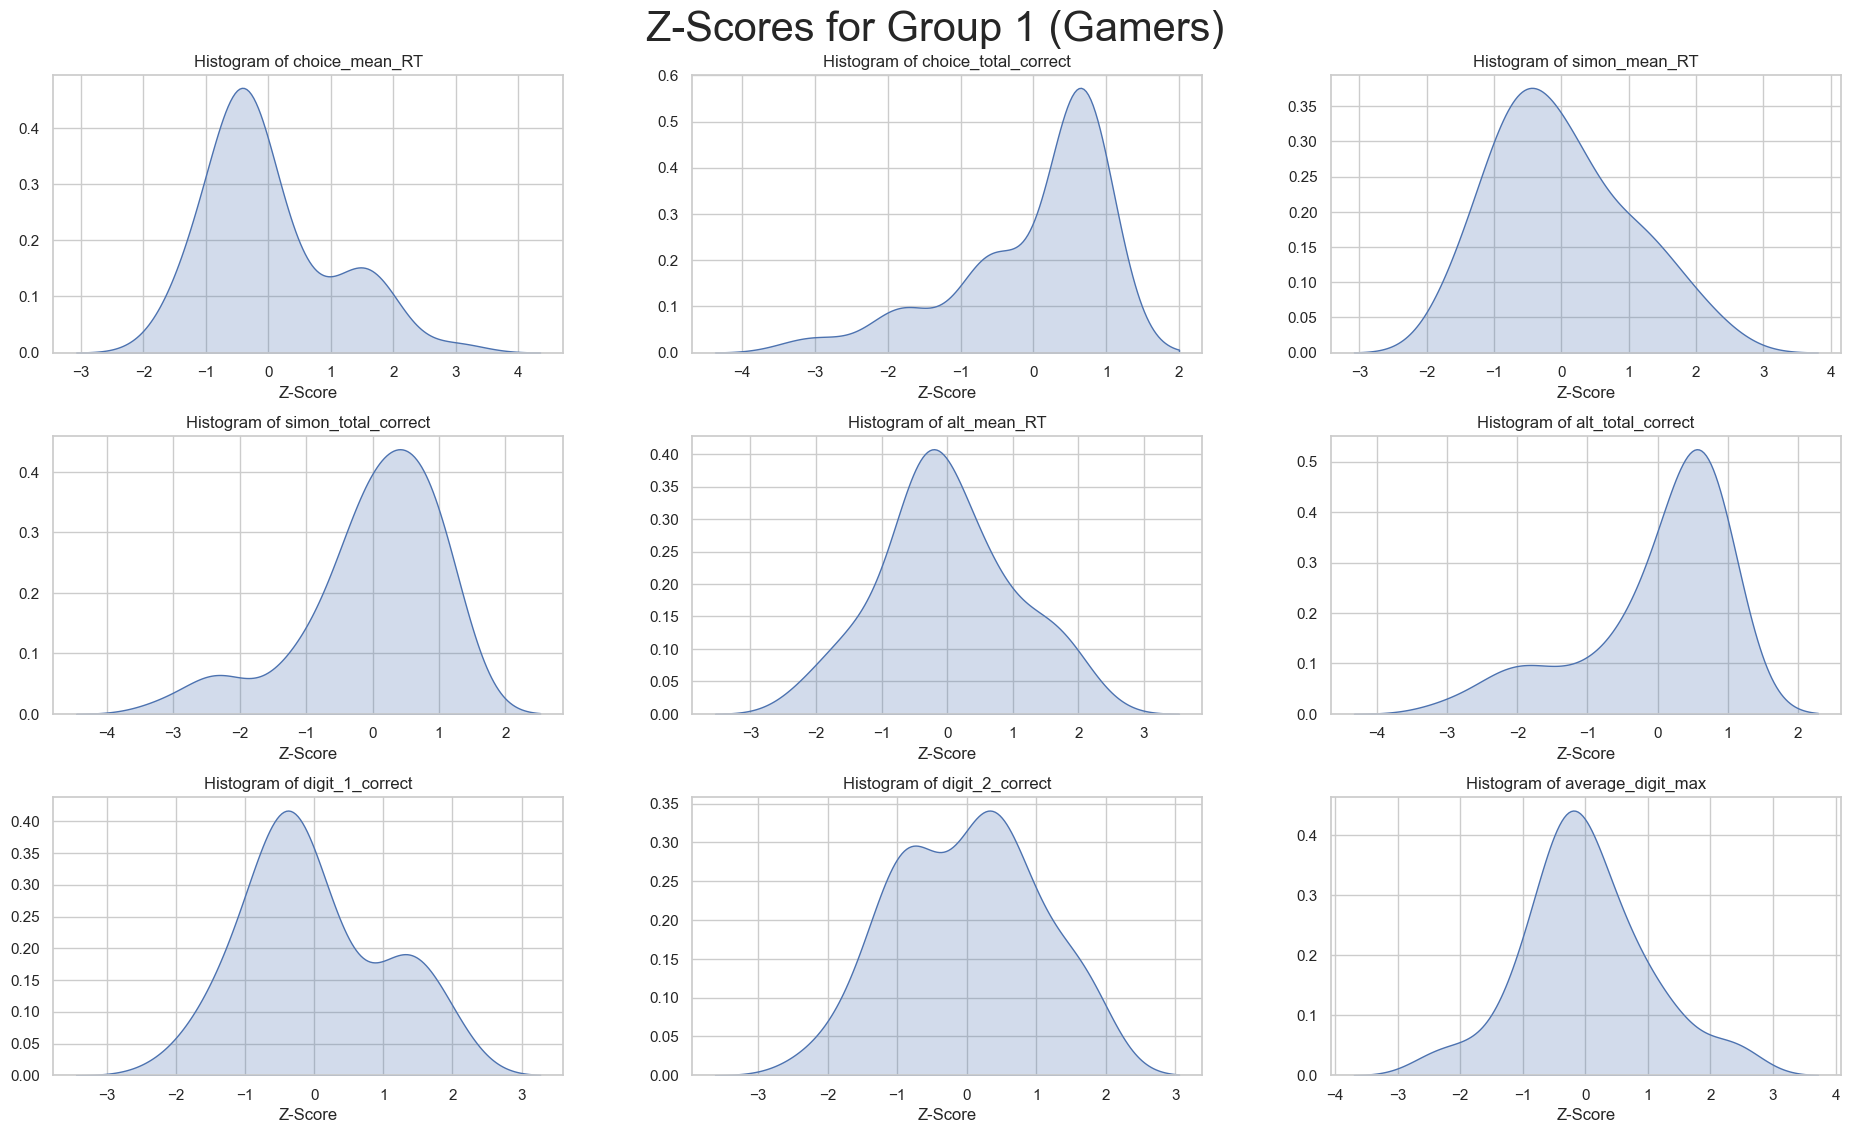

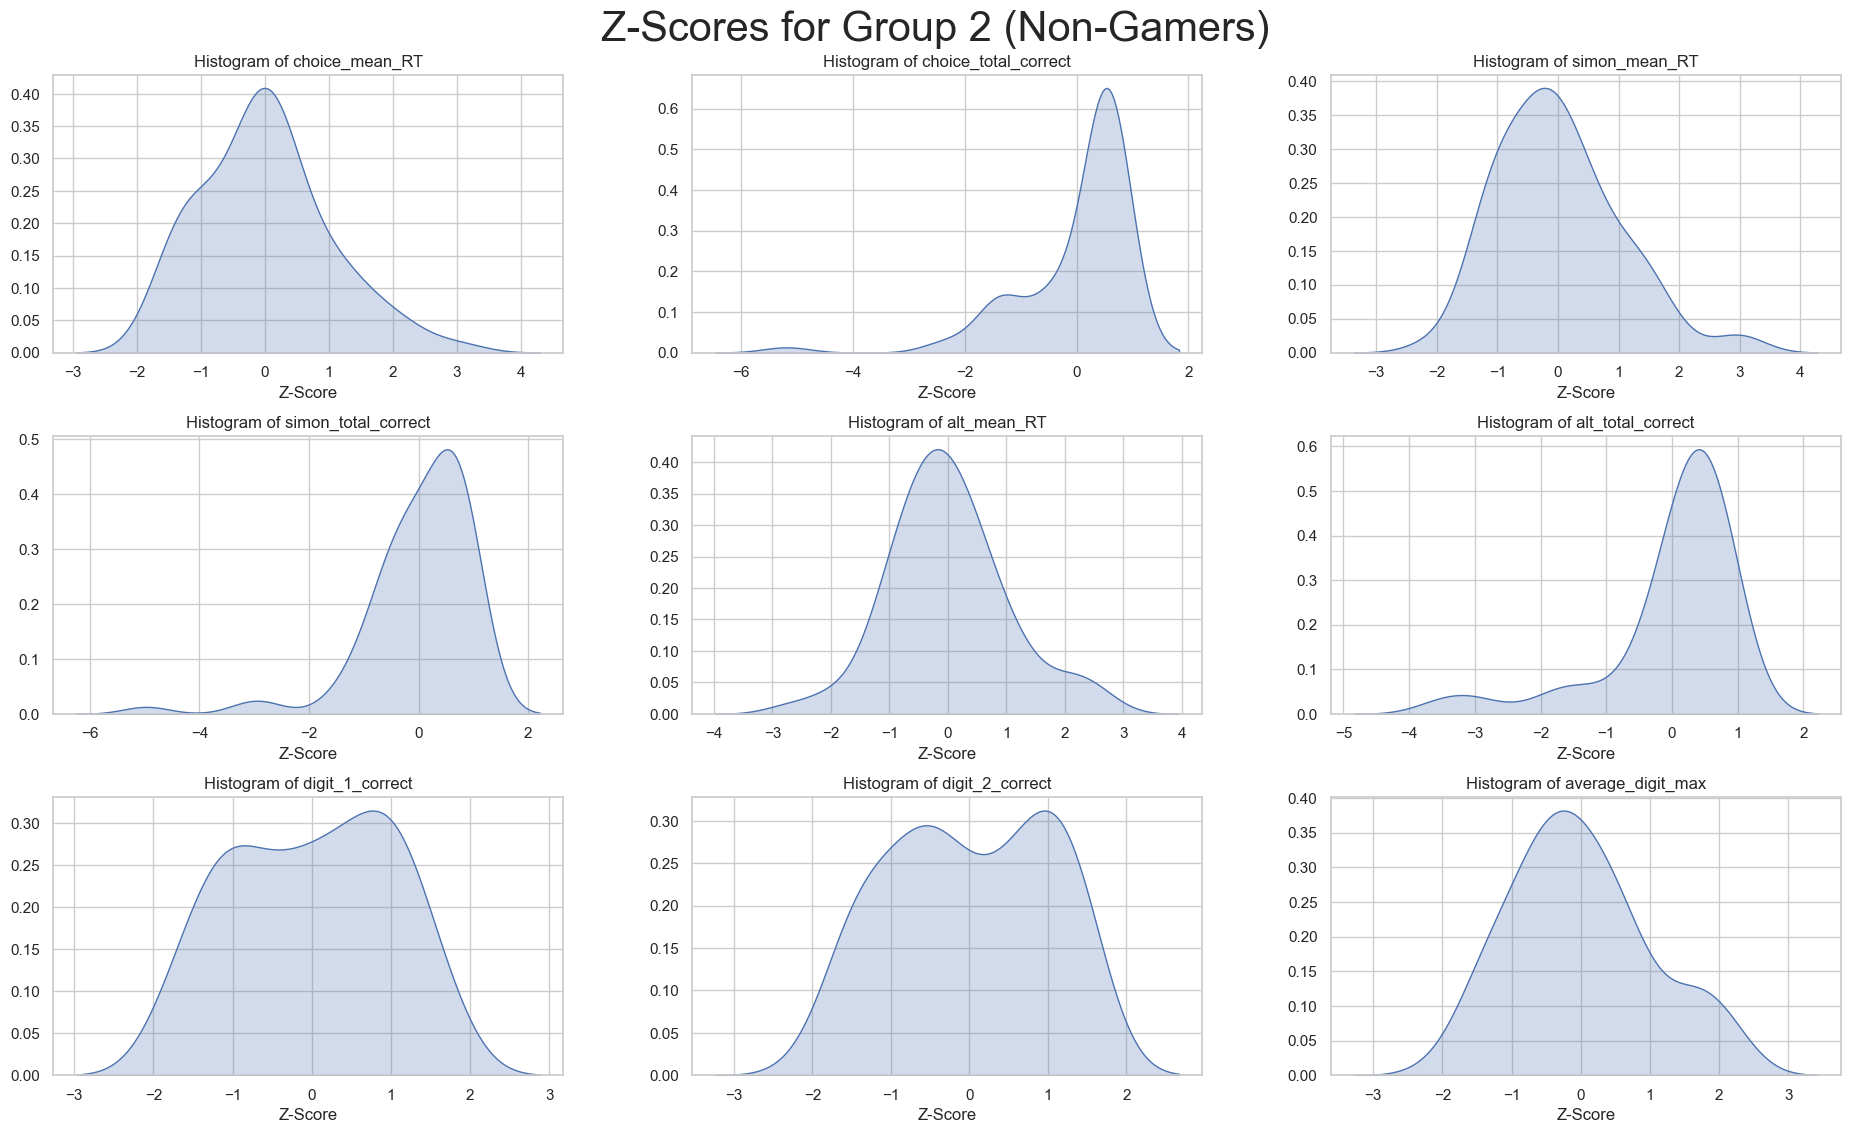

In [517]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
fig.tight_layout(pad=5.0)
fig.suptitle('Z-Scores for Group 1 (Gamers)', size=30)
for i, column in enumerate(critical_variables):
    coords = i // 3, i % 3
    sns.kdeplot(data=zscore(group1_data[column]), fill=True, ax=axs[coords], warn_singular=False)
    axs[coords].set_title(f'Histogram of {column}')
    axs[coords].set_xlabel('Z-Score')  
    axs[coords].set_ylabel('')

plt.subplots_adjust(hspace=0.3)
plt.show()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
fig.tight_layout(pad=5.0)
fig.suptitle('Z-Scores for Group 2 (Non-Gamers)', size=30)
for i, column in enumerate(critical_variables):
    coords = i // 3, i % 3
    sns.kdeplot(data=zscore(group2_data[column]), fill=True, ax=axs[coords], warn_singular=False)
    axs[coords].set_title(f'Histogram of {column}')
    axs[coords].set_xlabel('Z-Score')  
    axs[coords].set_ylabel('')

plt.subplots_adjust(hspace=0.3)
plt.show()

In [17]:
int_cols = ['choice_total_correct', 'simon_total_correct', 'alt_total_correct', 'digit_1_correct', 'digit_2_correct']

group1_zscores = group1_data[critical_variables].apply(zscore)
group2_zscores = group2_data[critical_variables].apply(zscore)

group1_means = group1_data[critical_variables].mask(np.abs(group1_zscores) > 3).mean()
group2_means = group2_data[critical_variables].mask(np.abs(group2_zscores) > 3).mean()

for col in int_cols:
    group1_means[col] = group1_means[col].astype(int)
    group2_means[col] = group2_means[col].astype(int)

for col in critical_variables:
    mask1 = (np.abs(group1_zscores[col]) > 3)
    mask2 = (np.abs(group2_zscores[col]) > 3)
    group1_data.loc[mask1, col] = group1_means[col]
    group2_data.loc[mask2, col] = group2_means[col]

In [18]:
df = pd.concat([group1_data, group2_data], axis=0).reset_index(drop=True)

# Confounder Variables

In [520]:
confounders = ['years_play', 'gaming_ability_connection', 'media_reports']
df['intercept'] = 1
X = df[['group'] + confounders]
y = df['fps_wk_hr']
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

1497.17


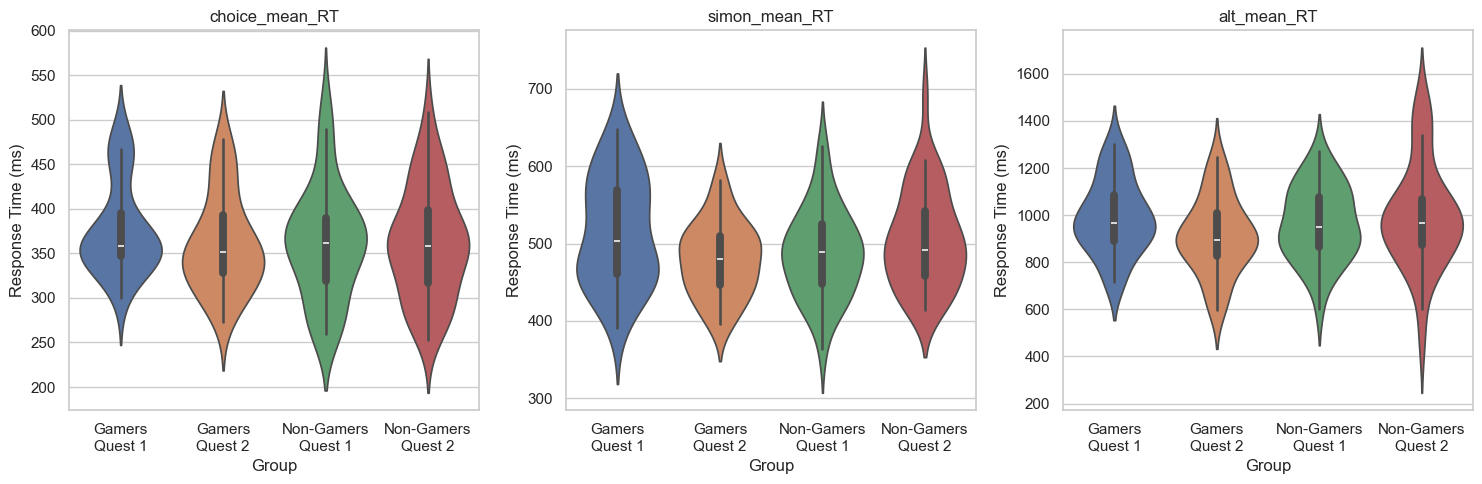

In [521]:
tasks = ['choice_mean_RT', 'simon_mean_RT', 'alt_mean_RT']

print(max(df['alt_mean_RT']))
fig, axes = plt.subplots(nrows=1, ncols=len(tasks), figsize=(15, 5))

for i, task in enumerate(tasks):
    gamers_quest_1 = df[(df['group'] == 1) & (df['quest_timing'] == 1)]
    gamers_quest_2 = df[(df['group'] == 1) & (df['quest_timing'] == 2)]

    non_gamers_quest_1 = df[(df['group'] == 2) & (df['quest_timing'] == 1)]
    non_gamers_quest_2 = df[(df['group'] == 2) & (df['quest_timing'] == 2)]

    data = pd.concat([
        pd.DataFrame({'Group': 'Gamers\nQuest 1', 'Response Time': gamers_quest_1[task]}),
        pd.DataFrame({'Group': 'Gamers\nQuest 2', 'Response Time': gamers_quest_2[task]}),
        pd.DataFrame({'Group': 'Non-Gamers\nQuest 1', 'Response Time': non_gamers_quest_1[task]}),
        pd.DataFrame({'Group': 'Non-Gamers\nQuest 2', 'Response Time': non_gamers_quest_2[task]})
    ])
    sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], hue='Group', legend=False)

    axes[i].set_title(task)
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel('Response Time (ms)')

plt.tight_layout()
plt.show()

### Group Effects - Choice RT Task

In [522]:
choice_rt_data = df[['group', 'quest_timing', 'choice_mean_RT', 'choice_total_correct']]

# Perform two-way ANOVA for mean RT
rt_anova = choice_rt_data.groupby(['group', 'quest_timing']).mean().reset_index()
anova_result = f_oneway(rt_anova[rt_anova['quest_timing'] == 1]['choice_mean_RT'],
                        rt_anova[rt_anova['quest_timing'] == 2]['choice_mean_RT'])

# Calculate mean RT
mean_rt = choice_rt_data['choice_mean_RT'].mean()
mean_rt_std = choice_rt_data['choice_mean_RT'].std()

# Perform Mann-Whitney U test for mean correct responses
before_gamers = choice_rt_data[(choice_rt_data['quest_timing'] == 1) & (choice_rt_data['group'] == 1)]['choice_total_correct']
after_gamers = choice_rt_data[(choice_rt_data['quest_timing'] == 2) & (choice_rt_data['group'] == 1)]['choice_total_correct']
before_non_gamers = choice_rt_data[(choice_rt_data['quest_timing'] == 1) & (choice_rt_data['group'] == 2)]['choice_total_correct']
after_non_gamers = choice_rt_data[(choice_rt_data['quest_timing'] == 2) & (choice_rt_data['group'] == 2)]['choice_total_correct']

mwu_before = mannwhitneyu(before_gamers, before_non_gamers)
mwu_after = mannwhitneyu(after_gamers, after_non_gamers)
mwu_total = mannwhitneyu(choice_rt_data[choice_rt_data['group'] == 1]['choice_total_correct'],
                         choice_rt_data[choice_rt_data['group'] == 2]['choice_total_correct'])
    
print("Choice-RT task")
print("\nMean RT")
print(f"A two-way ANOVA [Group x Questionnaire Timing (before or after the tasks)] revealed no group effect, "
      f"F(1, 127) = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.2f}, \u03B7\u00B2 = {anova_result.pvalue:.2f} "
      f"and no Questionnaire Timing effect, "
      f"F(1, 127) = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.2f}, "
      f"\u03B7\u00B2 = {anova_result.pvalue:.2f}. "
      f"In addition, no significant interaction was found, "
      f"F(1, 127) = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.2f}, "
      f"\u03B7\u00B2 = {anova_result.pvalue:.2f}. "
      f"The mean choice RT was {mean_rt:.2f} \u00B1 {mean_rt_std:.2f} ms.")

print("\nMean correct responses")
print(f"There were no differences between questionnaire delivery time (before or after the task) in gamers "
      f"(Mann-Whitney U = {mwu_before.statistic:.2f}, p = {mwu_before.pvalue:.2f}; "
      f"mean: {before_gamers.mean():.2f} \u00B1 {before_gamers.std():.2f}) "
      f"and non-gamers (Mann-Whitney U = {mwu_after.statistic:.2f}, p = {mwu_after.pvalue:.2f}; "
      f"mean: {after_gamers.mean():.2f} \u00B1 {after_gamers.std():.2f}). "
      f"There were also no differences in total correct responses between gamers and non-gamers "
      f"(Mann-Whitney U = {mwu_total.statistic:.2f}, p = {mwu_total.pvalue:.2f}).")

Choice-RT task

Mean RT
A two-way ANOVA [Group x Questionnaire Timing (before or after the tasks)] revealed no group effect, F(1, 127) = 1.07, p = 0.41, η² = 0.41 and no Questionnaire Timing effect, F(1, 127) = 1.07, p = 0.41, η² = 0.41. In addition, no significant interaction was found, F(1, 127) = 1.07, p = 0.41, η² = 0.41. The mean choice RT was 364.83 ± 58.23 ms.

Mean correct responses
There were no differences between questionnaire delivery time (before or after the task) in gamers (Mann-Whitney U = 495.00, p = 0.74; mean: 47.64 ± 0.62) and non-gamers (Mann-Whitney U = 541.50, p = 0.55; mean: 47.43 ± 0.73). There were also no differences in total correct responses between gamers and non-gamers (Mann-Whitney U = 2080.50, p = 0.84).


# Alternate task switching task including all data

In [523]:
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']].copy()

# Calculate the mean and standard deviation RT for each [group, quest_timing] combination
group_quest_stats = filtered_df.groupby(['group', 'quest_timing'])['alt_mean_RT'].agg(['mean', 'std']).reset_index()

# Format the results in the desired format
group_quest_stats['mean_std_format'] = group_quest_stats.apply(lambda row: f"{row['mean']:.2f} ± {row['std']:.2f} ms", axis=1)

# Print the formatted results
print(group_quest_stats[['group', 'quest_timing', 'mean_std_format']])


   group  quest_timing     mean_std_format
0      1             1  991.88 ± 156.62 ms
1      1             2  911.34 ± 161.55 ms
2      2             1  963.84 ± 157.52 ms
3      2             2  996.16 ± 222.69 ms


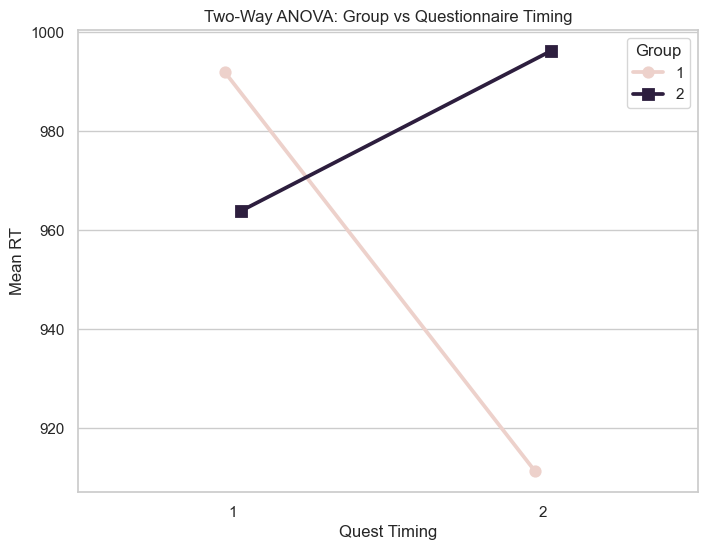

In [524]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=group_quest_stats, x='quest_timing', y='mean', hue='group', dodge=True,
              errorbar='sd', capsize=0.1, markers=['o', 's'])
plt.title('Two-Way ANOVA: Group vs Questionnaire Timing')
plt.xlabel('Quest Timing')
plt.ylabel('Mean RT')
plt.legend(title='Group')
plt.show()

In [565]:
from scipy.stats import f_oneway, ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']].copy()

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
group_2_data = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']

# One-way ANOVA for group effect
f_statistic_group, p_value_group = f_oneway(group_1_data, group_2_data)

# Independent t-test for quest timing effect
quest_timing_1_data = filtered_df[filtered_df['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data = filtered_df[filtered_df['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing, p_value_quest_timing = ttest_ind(quest_timing_1_data, quest_timing_2_data)

# Calculate effect sizes (Cohen's d) for group and quest timing effects
mean_group_1 = group_1_data.mean()
mean_group_2 = group_2_data.mean()
std_pooled_group = ((len(group_1_data) - 1) * group_1_data.std() ** 2 + (len(group_2_data) - 1) * group_2_data.std() ** 2) / (len(filtered_df) - 2)
effect_size_group = (mean_group_1 - mean_group_2) / std_pooled_group

mean_quest_timing_1 = quest_timing_1_data.mean()
mean_quest_timing_2 = quest_timing_2_data.mean()
std_pooled_quest_timing = ((len(quest_timing_1_data) - 1) * quest_timing_1_data.std() ** 2 + (len(quest_timing_2_data) - 1) * quest_timing_2_data.std() ** 2) / (len(filtered_df) - 2)
effect_size_quest_timing = (mean_quest_timing_1 - mean_quest_timing_2) / std_pooled_quest_timing

# Print results
print(f"Group Effect: F({len(filtered_df['group'].unique()) - 1}, {len(filtered_df) - len(filtered_df['group'].unique())}) = {f_statistic_group:.2f}, p = {p_value_group:.4f}, effect size = {effect_size_group:.2f}")
print(f"Quest Timing Effect: t({len(filtered_df) - 2}) = {t_statistic_quest_timing:.2f}, p = {p_value_quest_timing:.4f}, effect size = {effect_size_quest_timing:.2f}")


Group Effect: F(1, 129) = 0.00, p = 0.9721, effect size = -0.00
Quest Timing Effect: t(129) = 0.52, p = 0.6066, effect size = 0.00


# Beliefs about a connection between playing video games and the ability to perform cognitive-motor tasks

In [526]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'gaming_ability_connection']].copy()

# Separate the data for gamers and non-gamers
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']

# Perform independent t-test
t_statistic, p_value = ttest_ind(gamers_data, non_gamers_data)

# Calculate Cohen's d effect size
mean_gamers = gamers_data.mean()
mean_non_gamers = non_gamers_data.mean()
std_pooled = ((len(gamers_data) - 1) * gamers_data.std() ** 2 + (len(non_gamers_data) - 1) * non_gamers_data.std() ** 2) / (len(filtered_df) - 2)
effect_size = (mean_gamers - mean_non_gamers) / std_pooled

# Print results
print(f"Independent t-test: t({len(filtered_df) - 2}) = {t_statistic:.2f}, p = {p_value:.2f}, Cohen’s d = {effect_size:.2f}")
print(f"Mean response for gamers: {mean_gamers:.2f} ± {gamers_data.std():.2f}")
print(f"Mean response for non-gamers: {mean_non_gamers:.2f} ± {non_gamers_data.std():.2f}")
print(f"Median for both groups: {gamers_data.median()}")


Independent t-test: t(129) = -1.48, p = 0.14, Cohen’s d = -0.14
Mean response for gamers: 7.59 ± 1.62
Mean response for non-gamers: 8.05 ± 1.93
Median for both groups: 8.0


# Performance difference among the participants based on their belief about gaming ability connection and ability to perform cognitive motor tasks

## Simon Task

In [527]:
filtered_df = df[['group', 'gaming_ability_connection', 'simon_mean_RT']].copy()
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
gamers_rt = filtered_df[filtered_df['group'] == 1]['simon_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['simon_mean_RT']
# simon_mean_RT = filtered_df['simon_mean_RT']
corr_coefficient, p_value = pearsonr(gamers_data, gamers_rt)
print(f"Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")

Gamers - Pearson Correlation Coefficient: -0.152754976575636
P-value: 0.25231020547970284
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient: -0.05813240383080088
P-value: 0.6251785235783828
The correlation for non-gamers is not statistically significant.


## Choice RT Task

In [528]:
filtered_df = df[['group', 'gaming_ability_connection', 'choice_mean_RT']].copy()
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
gamers_rt = filtered_df[filtered_df['group'] == 1]['choice_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['choice_mean_RT']
# simon_mean_RT = filtered_df['simon_mean_RT']
corr_coefficient, p_value = pearsonr(gamers_data, gamers_rt)
print(f"Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")

Gamers - Pearson Correlation Coefficient: -0.10522014210853697
P-value: 0.4318239238305074
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient: 0.1280811160955572
P-value: 0.2801898970635284
The correlation for non-gamers is not statistically significant.


## Alternate Task Switching Task

In [529]:
filtered_df = df[['group', 'gaming_ability_connection', 'alt_mean_RT']].copy()
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
gamers_rt = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']
# simon_mean_RT = filtered_df['simon_mean_RT']
corr_coefficient, p_value = pearsonr(gamers_data, gamers_rt)
print(f"Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")

Gamers - Pearson Correlation Coefficient: -0.03906451350542154
P-value: 0.7709432818020064
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient: -0.14381379922309925
P-value: 0.2248013829742696
The correlation for non-gamers is not statistically significant.


# Awareness of media reports regarding playing video games and the ability to perform cognitive-motor tasks

## Simon Task

In [530]:
filtered_df = df[df['media_reports'] != 3][['group', 'media_reports', 'simon_mean_RT']].copy()

gamers_data = filtered_df[filtered_df['group'] == 1]['media_reports']
gamers_rt = filtered_df[filtered_df['group'] == 1]['simon_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['media_reports']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['simon_mean_RT']

corr_coefficient, p_value = pointbiserialr(gamers_data, gamers_rt)
print(f"Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate point-biserial correlation and p-value for non-gamers
corr_coefficient, p_value = pointbiserialr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between non-gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Point-Biserial Correlation Coefficient: 0.12637920405432368
P-value: 0.34887858966352486
The correlation for gamers is not statistically significant.

Non-Gamers - Point-Biserial Correlation Coefficient: -0.06997213864894783
P-value: 0.556367649900152
The correlation for non-gamers is not statistically significant.


## Choice RT Task

In [531]:
filtered_df = df[df['media_reports'] != 3][['group', 'media_reports', 'choice_mean_RT']].copy()

gamers_data = filtered_df[filtered_df['group'] == 1]['media_reports']
gamers_rt = filtered_df[filtered_df['group'] == 1]['choice_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['media_reports']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['choice_mean_RT']

corr_coefficient, p_value = pointbiserialr(gamers_data, gamers_rt)
print(f"Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate point-biserial correlation and p-value for non-gamers
corr_coefficient, p_value = pointbiserialr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between non-gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Point-Biserial Correlation Coefficient: -0.03772033744451798
P-value: 0.7805731535653843
The correlation for gamers is not statistically significant.

Non-Gamers - Point-Biserial Correlation Coefficient: -0.04675151306568398
P-value: 0.6944925785757459
The correlation for non-gamers is not statistically significant.


## Alternate Task Switching Task

In [532]:
filtered_df = df[df['media_reports'] != 3][['group', 'media_reports', 'alt_mean_RT']].copy()

gamers_data = filtered_df[filtered_df['group'] == 1]['media_reports']
gamers_rt = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['media_reports']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']

corr_coefficient, p_value = pointbiserialr(gamers_data, gamers_rt)
print(f"Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate point-biserial correlation and p-value for non-gamers
corr_coefficient, p_value = pointbiserialr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between non-gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Point-Biserial Correlation Coefficient: -0.15677072080825225
P-value: 0.24418545790170632
The correlation for gamers is not statistically significant.

Non-Gamers - Point-Biserial Correlation Coefficient: -0.0454842423922224
P-value: 0.7023813022450485
The correlation for non-gamers is not statistically significant.


# Understanding how different gaming genres may impact reaction time

In [533]:

def categorize_genre(row):
    if row['fps_wk_hr'] > row['roleplay_wk_hr'] and row['fps_wk_hr'] > row['strategy_wk_hr']:
        return 'FPS'
    elif row['roleplay_wk_hr'] > row['fps_wk_hr'] and row['roleplay_wk_hr'] > row['strategy_wk_hr']:
        return 'RPG'
    else:
        return 'strategy'

genre_df = df.copy()
genre_df['primary_genre'] = genre_df.apply(categorize_genre, axis=1)

# Extract reaction times for each group
fps_group = genre_df[genre_df['primary_genre'] == 'FPS']['choice_mean_RT']
rpg_group = genre_df[genre_df['primary_genre'] == 'RPG']['choice_mean_RT']
strategy_group = genre_df[genre_df['primary_genre'] == 'strategy']['choice_mean_RT']

from scipy.stats import shapiro
shapiro_normality_fps = shapiro(fps_group)
shapiro_normality_rpg = shapiro(rpg_group)
shapiro_normality_strategy = shapiro(strategy_group)
print(f"FPS group normality: {shapiro_normality_fps}")
if shapiro_normality_fps[1] < 0.05:
    print("The FPS group does not follow a normal distribution.")
print(f"RPG group normality: {shapiro_normality_rpg}")
if shapiro_normality_rpg[1] < 0.05:
    print("The RPG group does not follow a normal distribution.")
print(f"Strategy group normality: {shapiro_normality_strategy}")
if shapiro_normality_strategy[1] < 0.05:
    print("The Strategy group does not follow a normal distribution.")


if shapiro_normality_fps[1] > 0.05 and shapiro_normality_rpg[1] > 0.05 and shapiro_normality_strategy[1] > 0.05:
    print("All groups follow a normal distribution.")
else:
    print("At least one group does not follow a normal distribution.")
    print("Kruskal-Wallis H-test will be used instead of one-way ANOVA.\n")

from scipy.stats import kruskal
kruskal_test = kruskal(fps_group, rpg_group, strategy_group)
print(f"Kruskal-Wallis H-test: H = {kruskal_test.statistic:.2f}, p = {kruskal_test.pvalue:.4f}")
from scipy.stats import chi2
alpha = 0.05
dof = 2
H_critical = chi2.ppf(1 - alpha, dof)
print(f"Critical value of the chi-squared distribution with {dof} degrees of freedom: {H_critical:.2f}")
if kruskal_test.statistic > H_critical:
    print("Reject the null hypothesis that the groups have the same median.\n")
else:
    print("Fail to reject the null hypothesis that the groups have the same median.\n")

def games_howell(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    df_num = (var1 / n1 + var2 / n2)**2
    df_denom = (var1**2 / ((n1**2) * (n1 - 1)) + var2**2 / ((n2**2) * (n2 - 1)))
    dof = df_num / df_denom
    t_stat = (np.mean(data1) - np.mean(data2)) / np.sqrt(var1 / n1 + var2 / n2)
    p_value = 2 * t.cdf(-np.abs(t_stat), dof)
    return t_stat, p_value

t_stat, p_value = games_howell(fps_group, rpg_group)
print(f"FPS vs RPG: t = {t_stat:.2f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis that the medians of the FPS and RPG groups are equal.")
t_stat, p_value = games_howell(fps_group, strategy_group)
print(f"FPS vs Strategy: t = {t_stat:.2f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis that the medians of the FPS and Strategy groups are equal.")
t_stat, p_value = games_howell(rpg_group, strategy_group)
print(f"RPG vs Strategy: t = {t_stat:.2f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis that the medians of the RPG and Strategy groups are equal.")

FPS group normality: ShapiroResult(statistic=0.9275097758295191, pvalue=0.02648792594440071)
The FPS group does not follow a normal distribution.
RPG group normality: ShapiroResult(statistic=0.9795912766739534, pvalue=0.9287143692655412)
Strategy group normality: ShapiroResult(statistic=0.947611137754867, pvalue=0.003169620852437582)
The Strategy group does not follow a normal distribution.
At least one group does not follow a normal distribution.
Kruskal-Wallis H-test will be used instead of one-way ANOVA.

Kruskal-Wallis H-test: H = 3.95, p = 0.1387
Critical value of the chi-squared distribution with 2 degrees of freedom: 5.99
Fail to reject the null hypothesis that the groups have the same median.

FPS vs RPG: t = -1.79, p = 0.0788
FPS vs Strategy: t = -0.95, p = 0.3476
RPG vs Strategy: t = 1.18, p = 0.2456


# Assessing influence of Timing of Questioning on RT performance in gamers and non-gamers

## Choice RT task 

In [534]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'choice_mean_RT']].copy()

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['choice_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['choice_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['choice_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['choice_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Questionnaire Timing Effect in Gamers: t(56) = 1.20, p = 0.2345
Questionnaire Timing Effect in Non gamers: t(71) = -0.01, p = 0.9920


## Simon Task

In [535]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'simon_mean_RT']].copy()

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['simon_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['simon_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['simon_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['simon_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Questionnaire Timing Effect in Gamers: t(56) = 2.29, p = 0.0257
Questionnaire Timing Effect in Non gamers: t(71) = -1.30, p = 0.1974


## Alternate Task-switching task

In [536]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']].copy()

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")



Questionnaire Timing Effect in Gamers: t(56) = 1.93, p = 0.0593
Questionnaire Timing Effect in Non gamers: t(71) = -0.71, p = 0.4826


# Assessing influence of Timing of Questioning on Accuracy performance in gamers and non-gamers

## Choice RT task 

In [537]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'choice_total_correct']].copy()

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['choice_total_correct']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['choice_total_correct']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['choice_total_correct']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['choice_total_correct']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Questionnaire Timing Effect in Gamers: t(56) = 1.17, p = 0.2450
Questionnaire Timing Effect in Non gamers: t(71) = 0.06, p = 0.9484


## Simon task

In [538]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'simon_total_correct']].copy()

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['simon_total_correct']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['simon_total_correct']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['simon_total_correct']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['simon_total_correct']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Questionnaire Timing Effect in Gamers: t(56) = 0.44, p = 0.6605
Questionnaire Timing Effect in Non gamers: t(71) = 0.54, p = 0.5929


## Alternate task switching task

In [539]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'alt_total_correct']].copy()

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['alt_total_correct']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['alt_total_correct']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['alt_total_correct']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['alt_total_correct']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")



Questionnaire Timing Effect in Gamers: t(56) = 0.11, p = 0.9132
Questionnaire Timing Effect in Non gamers: t(71) = 0.33, p = 0.7424


# Relation between Reaction time and Accuracy

## Simon task

### Groupwise

In [540]:
filtered_df = df[['group', 'simon_mean_RT', 'simon_total_correct']].copy()
gamers_rt_mean = filtered_df[filtered_df['group'] == 1]['simon_mean_RT']
gamers_rt_correct = filtered_df[filtered_df['group'] == 1]['simon_total_correct']
non_gamers_rt_mean = filtered_df[filtered_df['group'] == 2]['simon_mean_RT']
non_gamers_rt_correct = filtered_df[filtered_df['group'] == 2]['simon_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(gamers_rt_mean, gamers_rt_correct)
print(f"Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_rt_mean, non_gamers_rt_correct)
print(f"\nNon-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between non-gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.03324631541457866
P-value: 0.804325458043898
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.07882214760812895
P-value: 0.5074167191818677
The correlation for non-gamers is not statistically significant.


### Overall

In [541]:
filtered_df = df[['simon_mean_RT', 'simon_total_correct']].copy()
rt_mean = filtered_df['simon_mean_RT']
rt_correct = filtered_df['simon_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(rt_mean, rt_correct)
print(f"Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between mean reaction time and total correct answers.")
    else:
        print("There is no correlation between mean reaction time and total correct answers.")
else:
    print("The correlation is not statistically significant.")



Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.05682637267305774
P-value: 0.5191247118026949
The correlation is not statistically significant.


## Choice RT Task

### Groupwise

In [542]:
filtered_df = df[['group', 'choice_mean_RT', 'choice_total_correct']].copy()
gamers_rt_mean = filtered_df[filtered_df['group'] == 1]['choice_mean_RT']
gamers_rt_correct = filtered_df[filtered_df['group'] == 1]['choice_total_correct']
non_gamers_rt_mean = filtered_df[filtered_df['group'] == 2]['choice_mean_RT']
non_gamers_rt_correct = filtered_df[filtered_df['group'] == 2]['choice_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(gamers_rt_mean, gamers_rt_correct)
print(f"Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_rt_mean, non_gamers_rt_correct)
print(f"\nNon-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between non-gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.4311680906973013
P-value: 0.0007275833996387461
The correlation for gamers is statistically significant.
There is a positive correlation between gamers' mean reaction time and total correct answers.

Non-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.209633294924599
P-value: 0.0750711461196667
The correlation for non-gamers is not statistically significant.


### Overall

In [543]:
filtered_df = df[['choice_mean_RT', 'choice_total_correct']].copy()
rt_mean = filtered_df['choice_mean_RT']
rt_correct = filtered_df['choice_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(rt_mean, rt_correct)
print(f"Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between mean reaction time and total correct answers.")
    else:
        print("There is no correlation between mean reaction time and total correct answers.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.2887942034853153
P-value: 0.0008219496068540066
The correlation for gamers is statistically significant.
There is a positive correlation between mean reaction time and total correct answers.


## Alternate task switching task

### Groupwise

In [544]:
filtered_df = df[['group', 'alt_mean_RT', 'alt_total_correct']].copy()
gamers_rt_mean = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
gamers_rt_correct = filtered_df[filtered_df['group'] == 1]['alt_total_correct']
non_gamers_rt_mean = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']
non_gamers_rt_correct = filtered_df[filtered_df['group'] == 2]['alt_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(gamers_rt_mean, gamers_rt_correct)
print(f"Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_rt_mean, non_gamers_rt_correct)
print(f"\nNon-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between non-gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.21657248184104846
P-value: 0.102488659496374
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.10233314989492094
P-value: 0.38895790102158534
The correlation for non-gamers is not statistically significant.


### Overall

In [545]:
filtered_df = df[['alt_mean_RT', 'alt_total_correct']].copy()
rt_mean = filtered_df['alt_mean_RT']
rt_correct = filtered_df['alt_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(rt_mean, rt_correct)
print(f"Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between mean reaction time and total correct answers.")
    else:
        print("There is no correlation between mean reaction time and total correct answers.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.05687924651059699
P-value: 0.5187353512666586
The correlation is not statistically significant.


# Analysis of Digit-Span Memory Task Performance Between Gamers and Non-Gamers: A Non-Parametric Statistical Approach

In [559]:
filtered_df = df[['group', 'average_digit_correct', 'average_digit_max', 'quest_timing']].copy()

gamers_data = filtered_df[df['group'] == 1][['group', 'average_digit_correct', 'average_digit_max', 'quest_timing']]
non_gamers_data = filtered_df[df['group'] == 2][['group', 'average_digit_correct', 'average_digit_max', 'quest_timing']]

## Two-Way ANOVA for Effects

In [566]:
simon_df = df[['group', 'quest_timing', 'simon_mean_RT']].copy()

mean_simon_model = ols('simon_mean_RT ~ C(group) * C(quest_timing)', data=simon_df).fit()

anova_simon_results = sm.stats.anova_lm(mean_simon_model, typ=2)

anova_simon_results['eta_sq'] = anova_simon_results['sum_sq'] / sum(anova_simon_results['sum_sq'])

print("Two-Way ANOVA Results for Simon Mean RT")
print("===============================================")
print(f"Overall mean: {simon_df['simon_mean_RT'].mean()}")
print(anova_simon_results.iloc[:-1, :][['F', 'PR(>F)', 'eta_sq']])


Two-Way ANOVA Results for Simon Mean RT
Overall mean: 497.0459852537133
                                 F    PR(>F)    eta_sq
C(group)                  0.001985  0.964532  0.000015
C(quest_timing)           0.276596  0.599858  0.002067
C(group):C(quest_timing)  6.566843  0.011557  0.049063


In [560]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_df = pd.concat([gamers_data, non_gamers_data])

mean_correct_model = ols('average_digit_correct ~ C(group) * C(quest_timing)', data=anova_df).fit()
mean_max_model = ols('average_digit_max ~ C(group) * C(quest_timing)', data=anova_df).fit()

anova_correct_results = sm.stats.anova_lm(mean_correct_model, typ=2)
anova_max_results = sm.stats.anova_lm(mean_max_model, typ=2)

anova_correct_results['eta_sq'] = anova_correct_results['sum_sq'] / sum(anova_correct_results['sum_sq'])
anova_max_results['eta_sq'] = anova_max_results['sum_sq'] / sum(anova_max_results['sum_sq'])

print("Two-Way ANOVA Results for Average Digit Correct")
print("===============================================")
print(f"Overall mean: {anova_df['average_digit_correct'].mean()}")
print(anova_correct_results.iloc[:-1, :][['F', 'PR(>F)', 'eta_sq']])
print("\nTwo-Way ANOVA Results for Average Digit Max")
print("===========================================")
print(f"Overall mean: {anova_df['average_digit_max'].mean()}")
print(anova_max_results.iloc[:-1, :][['F', 'PR(>F)', 'eta_sq']])


Two-Way ANOVA Results for Average Digit Correct
Overall mean: 5.877862595419847
                                 F    PR(>F)    eta_sq
C(group)                  2.265893  0.134733  0.017472
C(quest_timing)           0.265597  0.607197  0.002048
C(group):C(quest_timing)  0.151924  0.697357  0.001171

Two-Way ANOVA Results for Average Digit Max
Overall mean: 6.690839694656488
                                 F    PR(>F)    eta_sq
C(group)                  1.233195  0.268885  0.009510
C(quest_timing)           0.795246  0.374205  0.006133
C(group):C(quest_timing)  0.639065  0.425542  0.004928


In [549]:
from scipy.stats import shapiro, levene

def descriptive_statistics(data):
    statistics = {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data, ddof=1),
        'variance': np.var(data, ddof=1),
        'min': np.min(data),
        'max': np.max(data)
    }
    return statistics

def check_normality(data):
    stat, p = shapiro(data)
    print(f'\t Statistics = {stat:.3f}, p = {p:.3f}')
    if p > 0.05:
        print("Data follows a normal distribution.")
    else:
        print("Data does not follow a normal distribution.")

def check_variances(data1, data2):
    stat, p = levene(data1, data2)
    print(f'\nLevene’s Test:\n\t Statistics = {stat:.3f}, p = {p:.3f}')
    if p > 0.05:
        print("Variances are equal.")
    else:
        print("Variances are not equal.")
        
gamers_stats = descriptive_statistics(gamers_data['average_digit_correct'])
non_gamers_stats = descriptive_statistics(non_gamers_data['average_digit_correct'])

print("Gamers Statistics:\n", gamers_stats)
print("Non-Gamers Statistics:\n", non_gamers_stats)

Gamers Statistics:
 {'mean': 5.612068965517241, 'median': 5.5, 'std_dev': 1.7722101956642884, 'variance': 3.140728977616455, 'min': 2.0, 'max': 9.0}
Non-Gamers Statistics:
 {'mean': 6.089041095890411, 'median': 6.0, 'std_dev': 1.8225868096865034, 'variance': 3.3218226788432266, 'min': 2.5, 'max': 9.0}


### Conclusions
- The data suggests that gamers might have a slight edge in digit-span memory task performance compared to non-gamers, as indicated by the higher mean accuracy. However, the difference in mean scores is small.
- The identical medians suggest that the middle value of digit-span memory accuracies does not differ between the groups, despite the slight difference in means. The median being less than the mean in both cases suggests a right-skewed distribution,
- The dispersion metrics (standard deviation and variance) show that both groups have a similar spread of scores around the mean, with gamers being slightly less variable.
- The range of scores indicates a broad distribution of digit-span accuracies in both groups, with gamers showing a slightly higher minimum score.

### Statistical Significance
While these conclusions provide insights into the central tendencies and variability of digit-span accuracies between gamers and non-gamers, they don't necessarily indicate a statistically significant difference. To determine statistical significance, we need to conduct a hypothesis test (e.g., independent t-test or Mann-Whitney U test, depending on the data distribution) to see if the differences observed are likely due to chance or represent a true difference in populations.

Gamers Data Normality Test: (Shapiro-Wilk Test)
	 Statistics = 0.967, p = 0.110
Data follows a normal distribution.

Non-Gamers Data Normality Test: (Shapiro-Wilk Test)
	 Statistics = 0.929, p = 0.001
Data does not follow a normal distribution.

Levene’s Test:
	 Statistics = 1.080, p = 0.301
Variances are equal.


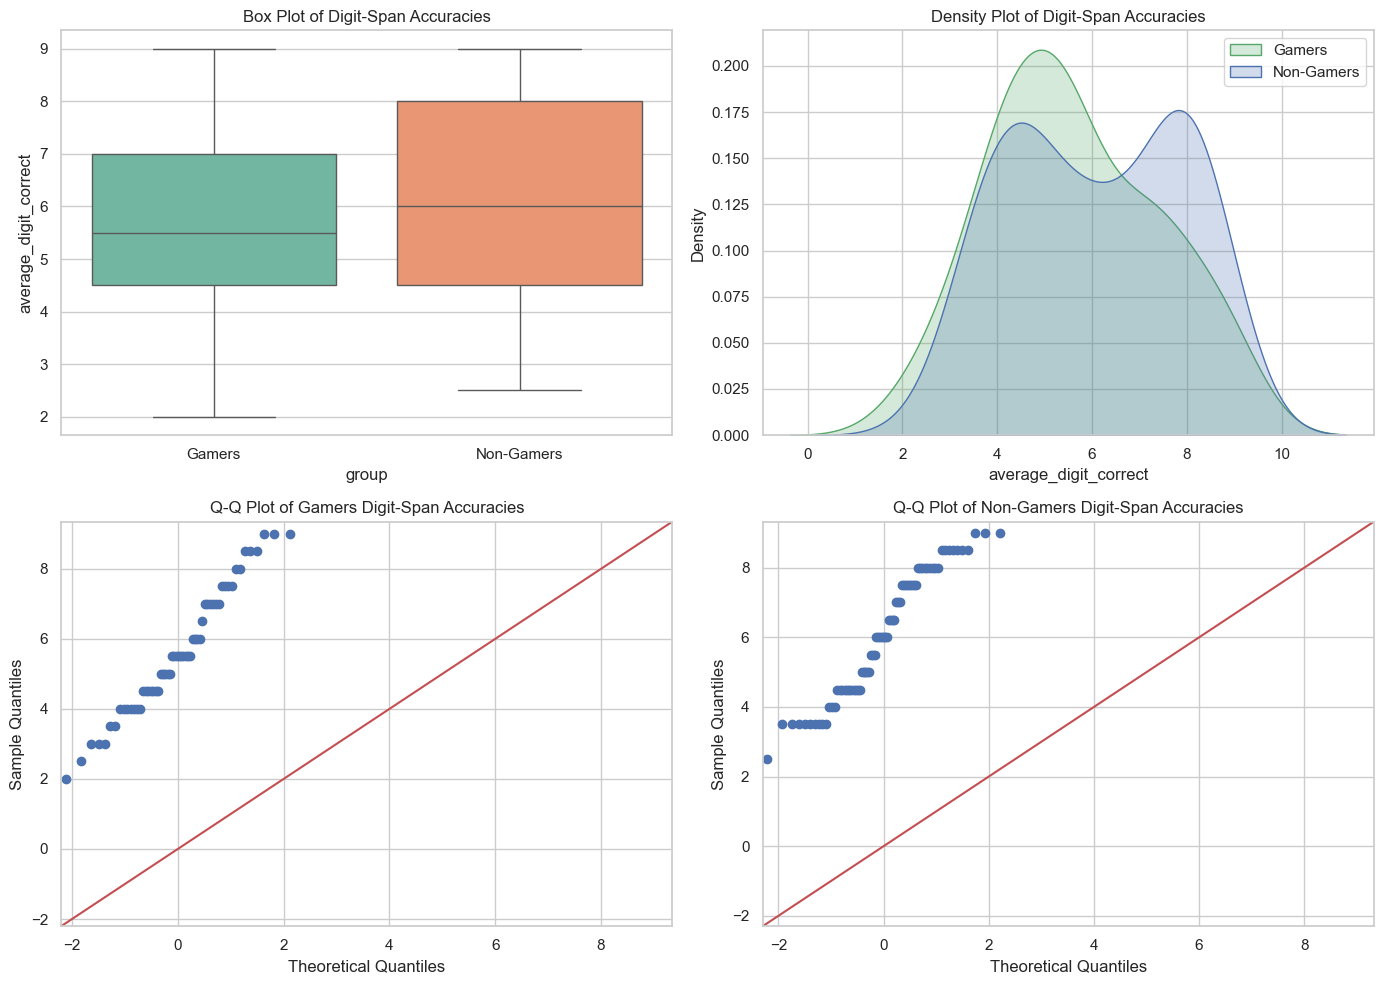

In [550]:
print("Gamers Data Normality Test: (Shapiro-Wilk Test)")
check_normality(gamers_data['average_digit_correct'])

print("\nNon-Gamers Data Normality Test: (Shapiro-Wilk Test)")
check_normality(non_gamers_data['average_digit_correct'])

check_variances(gamers_data['average_digit_correct'], non_gamers_data['average_digit_correct'])

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set_theme(style="whitegrid")

sns.boxplot(data=filtered_df, x='group', y='average_digit_correct', ax=axs[0, 0], hue='group', palette="Set2", legend=False)
axs[0, 0].set_xticks([0, 1], ['Gamers', 'Non-Gamers'])
axs[0, 0].set_title('Box Plot of Digit-Span Accuracies')

sns.kdeplot(gamers_data['average_digit_correct'], ax=axs[0, 1], fill=True, color="g", label="Gamers")
sns.kdeplot(non_gamers_data['average_digit_correct'], ax=axs[0, 1], fill=True, color="b", label="Non-Gamers")
axs[0, 1].set_title('Density Plot of Digit-Span Accuracies')
axs[0, 1].legend()

sm.qqplot(gamers_data['average_digit_correct'], line ='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot of Gamers Digit-Span Accuracies')

sm.qqplot(non_gamers_data['average_digit_correct'], line ='45', ax=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot of Non-Gamers Digit-Span Accuracies')

plt.tight_layout()
plt.show()

### Conclusions
- **Distribution**: Both gamers and non-gamers' digit-span accuracy data do not follow a normal distribution. Given the non-normal distribution, parametric tests that assume normality (like the independent t-test) are not suitable.
  
- **Variances**: The equality of variances between the two groups suggests that any differences in means can be tested using statistical tests that assume equal variances. However, given the non-normality of data, you would lean towards non-parametric tests that do not require the assumption of normality.

### Next Steps
Given these results, we'll use the Mann-Whitney U test to compare the mean accuracies between gamers and non-gamers. This non-parametric test is appropriate since the data likely does not follow a normal distribution and there are 2 groups.

In [551]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(gamers_data['average_digit_correct'], non_gamers_data['average_digit_correct'], alternative='two-sided')

print('Mann-Whitney U Test:\n\t Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05  
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Mann-Whitney U Test:
	 Statistics=1812.500, p=0.157
Same distribution (fail to reject H0)


## Conclusion

Based on the Mann-Whitney U test, there is no evidence to suggest a difference in digit-span memory task performance between gamers and non-gamers. 

In [553]:
gamers_before = gamers_data[filtered_df['quest_timing'] == 1]
gamers_after = gamers_data[filtered_df['quest_timing'] == 2]

print("Gamers Data Normality Test: (Shapiro-Wilk Test)")
check_normality(gamers_before)

print("\nNon-Gamers Data Normality Test: (Shapiro-Wilk Test)")
check_normality(gamers_after)

check_variances(gamers_before, gamers_after)

Gamers Data Normality Test: (Shapiro-Wilk Test)
	 Statistics = 0.957, p = 0.303
Data follows a normal distribution.

Non-Gamers Data Normality Test: (Shapiro-Wilk Test)
	 Statistics = 0.946, p = 0.134
Data follows a normal distribution.

Levene’s Test:
	 Statistics = 0.165, p = 0.686
Variances are equal.


In [554]:
stat, p = mannwhitneyu(gamers_before, gamers_after, alternative='two-sided')

print('Mann-Whitney U Test:\n\t Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05  
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Mann-Whitney U Test:
	 Statistics=431.000, p=0.870
Same distribution (fail to reject H0)


In [555]:
non_gamers_before = non_gamers_data[filtered_df['quest_timing'] == 1]
non_gamers_after = non_gamers_data[filtered_df['quest_timing'] == 2]

print("Gamers Data Normality Test: (Shapiro-Wilk Test)")
check_normality(non_gamers_before)

print("\nNon-Gamers Data Normality Test: (Shapiro-Wilk Test)")
check_normality(non_gamers_after)

check_variances(non_gamers_before, non_gamers_after)

Gamers Data Normality Test: (Shapiro-Wilk Test)
	 Statistics = 0.931, p = 0.033
Data does not follow a normal distribution.

Non-Gamers Data Normality Test: (Shapiro-Wilk Test)
	 Statistics = 0.916, p = 0.006
Data does not follow a normal distribution.

Levene’s Test:
	 Statistics = 0.780, p = 0.380
Variances are equal.


In [556]:
stat, p = mannwhitneyu(non_gamers_before, non_gamers_after, alternative='two-sided')

print('Mann-Whitney U Test:\n\t Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05  
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

print(non_gamers_before.mean())
print(non_gamers_after.mean())


Mann-Whitney U Test:
	 Statistics=729.500, p=0.463
Same distribution (fail to reject H0)
6.235294117647059
5.961538461538462
